In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

In [3]:
# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

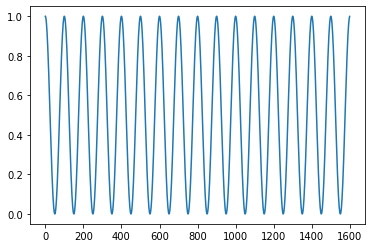

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [4]:
# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

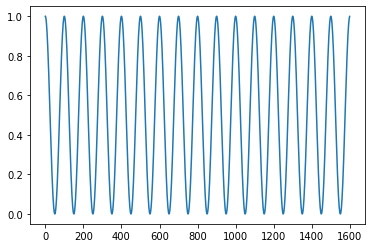

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]


In [6]:
# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [7]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)


In [8]:

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [9]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [10]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=0, batch_size=32, validation_data=(x_val, y_val))


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 0s 580us/step - loss: 0.1025 - val_loss: 0.0062
Epoch 2/200
760/760 [==============================] - 0s 43us/step - loss: 0.0541 - val_loss: 0.0190
Epoch 3/200
760/760 [==============================] - 0s 43us/step - loss: 0.0454 - val_loss: 0.0088
Epoch 4/200
760/760 [==============================] - 0s 43us/step - loss: 0.0372 - val_loss: 0.0152
Epoch 5/200
760/760 [==============================] - 0s 44us/step - loss: 0.0296 - val_loss: 0.0101
Epoch 6/200
760/760 [==============================] - 0s 43us/step - loss: 0.0292 - val_loss: 0.0102
Epoch 7/200
760/760 [==============================] - 0s 42us/step - loss: 0.0344 - val_loss: 0.0093
Epoch 8/200
760/760 [==============================] - 0s 43us/step - loss: 0.0277 - val_loss: 0.0126
Epoch 9/200
760/760 [==============================] - 0s 44us/step - loss: 0.0255 - val_loss: 0.0090
Epoch 10/200
760/760 [============

760/760 [==============================] - 0s 43us/step - loss: 0.0108 - val_loss: 0.0046
Epoch 79/200
760/760 [==============================] - 0s 46us/step - loss: 0.0091 - val_loss: 0.0044
Epoch 80/200
760/760 [==============================] - 0s 43us/step - loss: 0.0102 - val_loss: 0.0059
Epoch 81/200
760/760 [==============================] - 0s 43us/step - loss: 0.0095 - val_loss: 0.0052
Epoch 82/200
760/760 [==============================] - 0s 46us/step - loss: 0.0098 - val_loss: 0.0041
Epoch 83/200
760/760 [==============================] - 0s 43us/step - loss: 0.0089 - val_loss: 0.0045
Epoch 84/200
760/760 [==============================] - 0s 58us/step - loss: 0.0091 - val_loss: 0.0046
Epoch 85/200
760/760 [==============================] - 0s 41us/step - loss: 0.0089 - val_loss: 0.0045
Epoch 86/200
760/760 [==============================] - 0s 43us/step - loss: 0.0096 - val_loss: 0.0041
Epoch 87/200
760/760 [==============================] - 0s 43us/step - loss: 0.0103 - 

Epoch 157/200
760/760 [==============================] - 0s 43us/step - loss: 0.0084 - val_loss: 0.0054
Epoch 158/200
760/760 [==============================] - 0s 49us/step - loss: 0.0084 - val_loss: 0.0046
Epoch 159/200
760/760 [==============================] - 0s 42us/step - loss: 0.0083 - val_loss: 0.0046
Epoch 160/200
760/760 [==============================] - 0s 43us/step - loss: 0.0077 - val_loss: 0.0045
Epoch 161/200
760/760 [==============================] - 0s 44us/step - loss: 0.0087 - val_loss: 0.0044
Epoch 162/200
760/760 [==============================] - 0s 44us/step - loss: 0.0079 - val_loss: 0.0051
Epoch 163/200
760/760 [==============================] - 0s 43us/step - loss: 0.0080 - val_loss: 0.0048
Epoch 164/200
760/760 [==============================] - 0s 45us/step - loss: 0.0084 - val_loss: 0.0051
Epoch 165/200
760/760 [==============================] - 0s 42us/step - loss: 0.0075 - val_loss: 0.0050
Epoch 166/200
760/760 [==============================] - 0s 41us

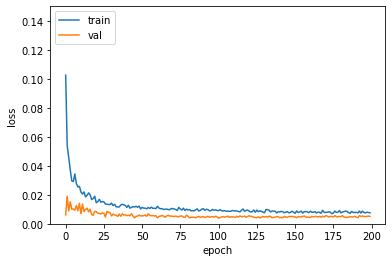

In [11]:
# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.004967693011521509
Validataion Score:  0.005090909285677804
Test Score:  0.005090909285677804


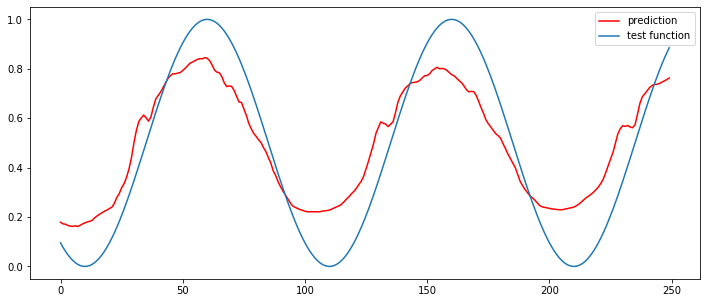

In [13]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()